## 회귀분석의 필요성


  - **핵심 목적**: 하나의 값(원인)이 변할 때 다른 값(결과)이 어떻게 변하는지 관계를 파악하고, 이를 통해 **미래를 예측**하고자 할 때 사용되는 가장 기본적이고 강력한 도구가 회귀 분석(Regression Analysis)임.
  - **역할**: 단순히 '관련 있다'를 넘어, '어느 정도로, 어떤 방식으로' 관련 있는지 수학적 모델(방정식)로 명확하게 설명함.

## 2. 핵심 원리 파헤치기 (Deep Dive)

### 회귀 분석이란 무엇일까요?

  - `회귀 분석(Regression Analysis)`의 정의: 관찰된 연속적인 값들 사이의 관계를 **수학적 모델**로 구한 뒤, 이 모델이 데이터에 얼마나 잘 맞는지를 측정하는 분석 방법임.
  - **`상관 분석` vs `회귀 분석`**
      - **상관 분석**: 두 변수가 얼마나 '**선형적으로 관련**' 있는지만 확인하며, 원인과 결과의 개념은 없음.
      - **회귀 분석**: 한 변수(**독립 변수, 원인**)가 다른 변수(**종속 변수, 결과**)에 미치는 영향을 분석하는 **인과관계** 모델임. 이를 통해 구체적인 관계식을 도출하여 예측에 활용함.
  - **용어의 유래**: 프랜시스 골턴의 연구에서 유래함. 부모 세대의 키가 크거나 작더라도 자녀 세대의 키는 전체 인구의 **평균으로 돌아가려는(회귀, Regress)** 경향에서 이름이 붙여짐.

### 회귀 분석을 위한 5가지 약속 (전제 사항)

  - 정확하고 신뢰도 높은 회귀 분석 결과를 위해서는 데이터가 다음 5가지 가정을 만족해야 함.


1.  **선형성(Linearity)**: 독립 변수와 종속 변수 간에 **직선 관계**가 존재해야 함.
2.  **독립성(Independence)**: **오차**(예측값-실제값)와 독립 변수의 값은 서로 관련이 없어야 함.
3.  **등분산성(Homoscedasticity)**: 독립 변수의 모든 값에 대해 오차들의 **분산이 일정**해야 함.
4.  **비상관성(No Autocorrelation)**: 관측된 값들의 오차끼리는 서로 **상관관계가 없어야** 함.
5.  **정상성(Normality)**: 오차는 평균이 0인 **정규분포**를 따라야 함.

| 전제사항 | 설명 |
| :--- | :--- |
| **선형성** | 독립변수의 변화에 따라 종속변수도 일정 크기로 변함 |
| **독립성** | 오차와 독립변수의 값이 관련이 없음 |
| **등분산성** | 독립변수의 모든 값에 대해 오차들의 분산이 일정 |
| **비상관성** | 관측치의 오차들 사이에 상관관계가 없음 |
| **정상성** | 오차가 정규분포를 따름 |

### 모집단과 표본

  - **`모집단(Population)`**: 분석하려는 대상 전체. (예: 대한민국 모든 성인 남성의 키)
  - **`표본(Sample)`**: 모집단의 일부. 현실적인 제약으로 인해 모집단 전체를 조사하기 어려울 때 사용함.
  - **`추정(Estimation)`**: 표본 분석 결과를 통해 모집단 전체의 특성을 추론하는 과정.

### 데이터는 어떤 모양으로 분포할까?

  - 데이터 분석 전, 데이터가 어떤 형태(분포)를 띠는지 파악하는 것이 중요함.

  - **이산형 확률분포**: 값이 딱딱 끊어지는 변수에 대한 분포. (예: 주사위 눈금, 성공/실패 횟수)

  - **연속형 확률분포**: 값이 연속적인 변수에 대한 분포. (예: 키, 몸무게, 시간)

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1) 이산형 확률분포 시각화

In [1]:
# 데이터 분석과 시각화를 위한 라이브러리를 가져옵니다.
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook 환경에서 그래프를 바로 볼 수 있게 합니다.
%matplotlib inline

# 난수 생성을 위한 시드(seed)를 0으로 설정하여 항상 같은 난수가 나오도록 합니다.
np.random.seed(0)



#### 이항분포 (Binomial Distribution)


  - '성공' 또는 '실패'의 두 가지 결과만 나오는 실험을 여러 번 반복했을 때의 **성공 횟수 분포**임.

In [2]:
# 성공 확률이 0.5인 실험(p)을 10번 반복(n)하는 것을 100개의 샘플(size)로 생성합니다.
binomial = np.random.binomial(n=10, p=0.5, size=100)

# 생성된 데이터의 구간별 빈도를 계산합니다.
np.histogram(binomial)

(array([ 1,  4, 18,  0, 17, 27,  0, 19,  9,  5]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]))

##### 코드 해설

##### 시각화

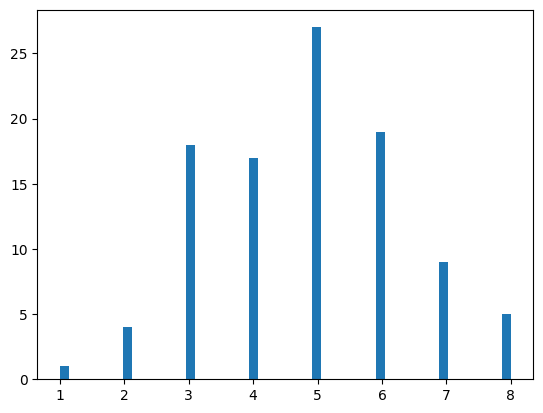

In [3]:
# 이항분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(binomial, bins=50) # bins = 구간을 나눈다
plt.show()

#### 베르누이 분포 (Bernoulli Distribution)

  - 이항분포에서 **시행 횟수(n)가 1**인 특별한 경우. 즉, 결과를 한 번만 관찰하는 실험임.

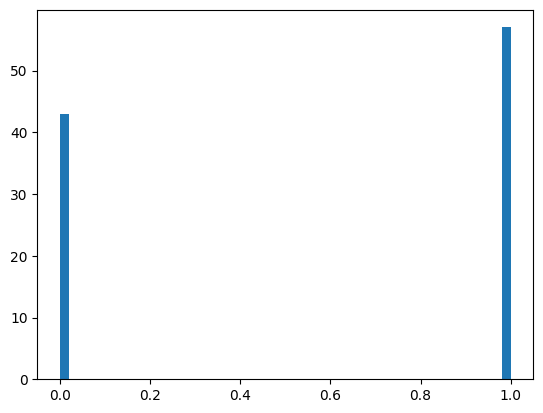

In [4]:
# 성공 확률이 0.5인 실험을 1번만 시행(n=1)하는 것을 100개의 샘플로 생성합니다.
bernoulli = np.random.binomial(1, 0.5, 100)


# 베르누이 분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(bernoulli, bins=50)
plt.show()

##### 코드 해설

#### 기하분포 (Geometric Distribution)

  - **첫 성공이 나올 때까지** 몇 번의 시도를 했는지를 나타내는 분포임.


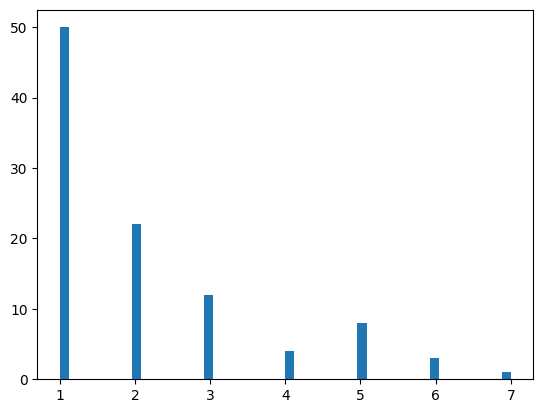

In [5]:
# 성공 확률이 0.5인 실험에서 첫 성공까지의 시도 횟수를 100개 샘플로 생성합니다.
geome = np.random.geometric(0.5, 100)

# 기하분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(geome, bins=50)
plt.show()

##### 코드 해설


#### 다항분포 (Multinomial Distribution)


  - 이항분포를 확장한 형태로, 결과가 **3가지 이상**인 경우(예: 주사위 던지기)에 사용됨.

In [6]:
# 각 눈이 나올 확률이 1/6인 주사위를 20번(n) 던지는 시행을 1번(size) 했을 때,
# 각 눈(1~6)이 나온 횟수를 출력합니다.
multi = np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
print(multi)

[[6 4 2 1 3 4]]


##### 코드 해설

In [7]:
# 주사위를 20번 던지는 시행을 10회 반복했을 때의 결과입니다.
multi_10 = np.random.multinomial(n=20, pvals=[1/6.]*6, size=10)
print(multi_10)

[[2 2 1 6 1 8]
 [5 1 1 2 6 5]
 [2 3 4 5 4 2]
 [2 2 1 4 4 7]
 [3 4 4 2 3 4]
 [2 5 1 5 5 2]
 [5 2 3 4 2 4]
 [3 2 3 1 7 4]
 [1 4 3 4 6 2]
 [4 1 3 4 4 4]]


##### 코드 해설



### 2) 연속형 확률분포 시각화

In [8]:
# 새로운 시뮬레이션을 위해 라이브러리를 다시 import 하고 seed를 설정합니다.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#### 균일분포 (Uniform Distribution)

  - 특정 범위 내의 모든 값이 **나타날 확률이 동일**한 분포임.

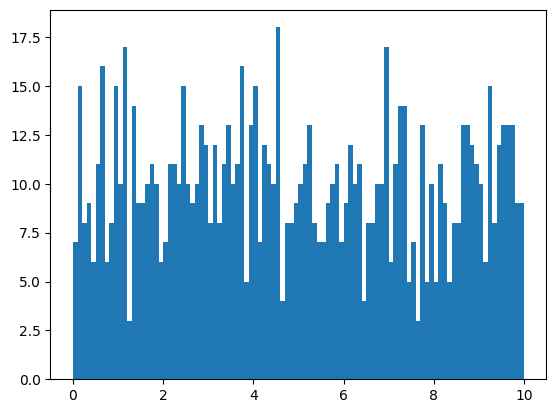

In [9]:
# 0에서 10 사이의 모든 실수가 균일한 확률로 나오도록 1000개의 난수를 생성합니다.
unif = np.random.uniform(0, 10, 1000)

# 균일분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(unif, bins=100)
plt.show()

##### 코드 해설

#### 정규분포 (Normal Distribution)

  - 자연 및 사회 현상에서 가장 흔하게 나타나는 분포로, **평균**을 중심으로 **좌우대칭인 종 모양**을 가짐.

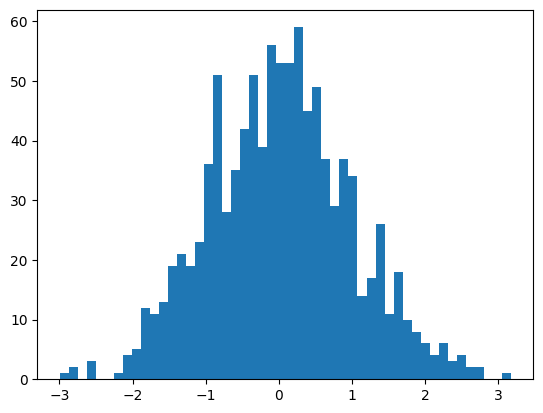

In [10]:
# 평균이 0이고 표준편차가 1인 표준정규분포를 따르는 난수 1000개를 생성합니다.
norm = np.random.normal(loc=0, scale=1, size=1000)

# 정규분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(norm, bins=50)
plt.show()

##### 코드 해설

#### 지수분포 (Exponential Distribution)

  - 특정 사건이 발생할 때까지 **걸리는 시간**에 대한 분포임.

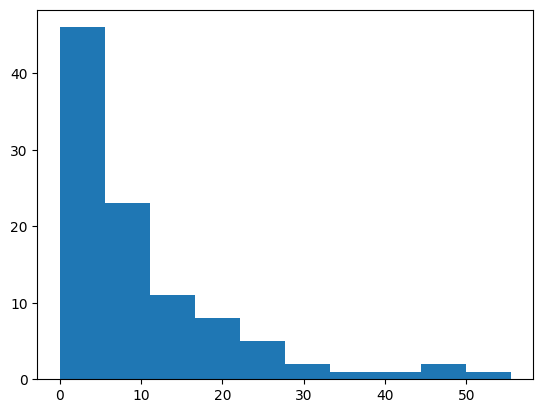

In [11]:
# 특정 비율(scale=10)로 발생하는 사건에 대해 100개의 난수를 생성합니다.
expo = np.random.exponential(scale=10, size=100)

# 지수분포 데이터를 히스토그램으로 시각화합니다.
plt.hist(expo, bins=10)
plt.show()

##### 코드 해설

## 4. 핵심 요약 (Key Takeaways)

  - **회귀 분석은 예측 모델이다**: 회귀 분석의 목적은 변수 간 '관계' 파악을 넘어, **인과관계 기반의 예측 모델**을 만드는 것임.
  - **가정이 결과를 좌우한다**: 신뢰도 높은 결과를 위해 **선형성, 독립성, 등분산성, 비상관성, 정상성** 5가지 기본 가정을 반드시 확인해야 함.
  - **데이터의 분포를 이해하는 것이 첫걸음이다**: 데이터가 따르는 **확률 분포**를 이해하는 것은 통계적 모델링의 가장 기초적이고 중요한 단계임.